<a href="https://colab.research.google.com/github/lauraKatz/CursoPythonEspecializacion/blob/main/Bit3_Ejemplo_modulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Google_Colaboratory_SVG_Logo.svg/1200px-Google_Colaboratory_SVG_Logo.svg.png" width = 400></td>
    <td><img src="https://www.pngkey.com/png/full/4-44913_plus-sign-clipart-blue-plus-sign.png" width = 100></td>
    <td><img src="https://neuronamagazine.com/wp-content/uploads//2020/08/logo-ubits-2020.png" width = 400></td>
  </tr>
</table>

Bienvenido a este cuaderno de **Google-Colaboratory**. Recuerda que para poder ver la ejecución de este ejemplo, es importante que primero vayas al menú **Entorno de Ejecución**, y de ahí escoger la opción **Ejecutar todas**.

De manera alternativa puedes ir ejecutando celda por celda al presionar el boton de play que está en la parte izquierda de cada una de ellas.

**Es importante que todas las celdas hayan sido ejecutadas al menos 1 vez, de lo contrario el cuaderno no funcionará**

In [4]:
class Tabla_de_Datos:
  ''' Para que esta clase funcione se necesita una URL abierta de algun archivo Google Sheets'''
  def __init__(self, url):
    import pandas as pd
    from google.colab import auth
    auth.authenticate_user()
    import gspread
    from google.auth import default
    creds, _ = default()
    self.gc= gspread.authorize(creds)
    self.datos=self.gc.open_by_url(url)
    self.rows = self.datos.sheet1.get_all_values()
    self.df=pd.DataFrame.from_records(self.rows).iloc[1:,1:]
    self.df.columns=pd.DataFrame.from_records(self.rows).iloc[0,1:]

In [5]:
def distinguir_col_cuant_cual(dataframe,       # Argumento posicional (obligatorio)
                              n_etiquetas=10): # Argumento por defecto (opcional)
  '''
  Esta función me ayudará a distinguir entre columnas cuantitativas y cualitativas.
  Por defecto la función marcará como cualitativa aquellas columnas con 10 o menos etiquetas
  Devolverá una lista con las columnas cuantitativas primero y después una lista de columnas
  cualitativas.
  '''
  # Distinguiendo entre variables cuantitativas y cualitativas
  cuantitativas=[]
  cualitativas=[]

  # Ciclo for que nos permitirá revisar de columna en columna
  for col in dataframe.columns:
    # If que nos permitirá identificar las columnas con valores decimales
    if dataframe[col].dtype=="float64":
      cuantitativas.append(col)
    # Elif que nos permitirá identificar las columnas con valores de texto
    elif dataframe[col].dtype=="object":
      cualitativas.append(col)
    # Else que nos permitirá identificar las columnas con valores enteros
    else:
      # Distinguiendo los valores enteros entre cuantitativos y cualitativos
      # dependiendo el número de etiquetas en la columna
      if dataframe[col].nunique()>=n_etiquetas:
        cuantitativas.append(col)
      else:
        cualitativas.append(col)

  return {"Col_cuantitativas":cuantitativas,
          "Col_cualitativas":cualitativas}

In [6]:
def Pastel(dataframe, columna, decimales, grafica):
  '''
  Esta función generará una gráfica de pastel del dataframe y la columna
  que se indique; y se colocará en el objeto gráfica(ax) que se proporcione.
  '''
  dataframe[columna].value_counts().plot(kind="pie",
            autopct="%.{}f%%".format(decimales),
            ax=grafica)
  grafica.set_title("Distribución de " + columna)
  return grafica

In [13]:
# Prueba de la clase
prueba=Tabla_de_Datos("https://docs.google.com/spreadsheets/d/19m1jc7IE__p_sL6pV8y-k8ajh0MoYW6qnRs8vkRhvEk/edit?usp=sharing")

In [17]:
print(prueba)

In [8]:
prueba.df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [18]:
distinguir_col_cuant_cual(prueba.df)

{'Col_cuantitativas': [],
 'Col_cualitativas': ['Gender',
  'Age',
  'Annual Income (k$)',
  'Spending Score (1-100)']}

<Axes: ylabel='Gender'>

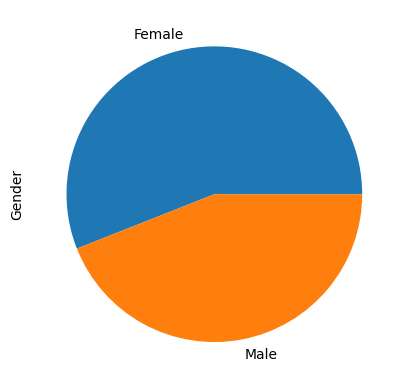

In [28]:
#Pastel(prueba.df,'Gender',0,'grafica')
prueba.df['Gender'].value_counts().plot(kind="pie")